In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
#Importing the other necessary libraries
import os
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing OpenCV - the computer vision library
import cv2

In [9]:
from scipy import signal
from skimage.filters import threshold_otsu

In [3]:
path='/Users/StevenTseng/Desktop/yy.png'

Text(0.5, 1.0, 'Contour detection after 2 convolutions')

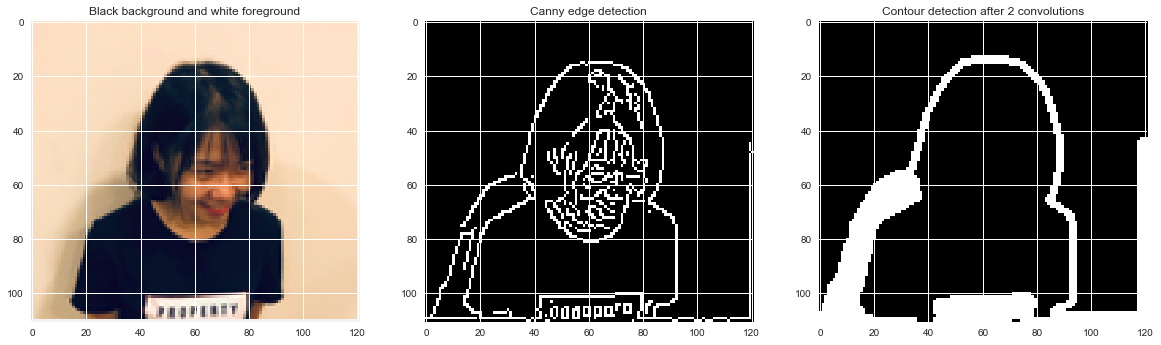

In [12]:
        bwimg=cv2.imread(str(path))
        bwimg=cv2.cvtColor(bwimg,cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(20,8))
        plt.subplot(1,3,1)
        plt.imshow(bwimg)
        plt.title('Black background and white foreground')
        
        plt.subplot(1,3,2)
        bwimg=cv2.cvtColor(bwimg,cv2.COLOR_RGB2GRAY)
        bwimg_canny=cv2.Canny(bwimg,50,80)
        plt.imshow(bwimg_canny,cmap='gray')
        plt.title('Canny edge detection')
        
        plt.subplot(1,3,3)
        bwimg_cont=cv2.findContours(bwimg_canny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[1]
        #Now to create masks with contours
        bwimg_bg=np.zeros(bwimg.shape)
        bwimg_mask=cv2.drawContours(bwimg_bg,bwimg_cont,-1,255,-1)
        
        #Convolving once
        bwimg_mask_smooth=signal.convolve2d(np.where(bwimg_mask==255,1,0),np.full((3,3),1/9),'same')
        bwimg_mask_smooth_thresh=threshold_otsu(bwimg_mask_smooth)
        bwimg_conv1=np.where(np.where(bwimg_mask_smooth>bwimg_mask_smooth_thresh,0,bwimg_mask_smooth)>0,1,0)
        
        #Convolving again
        bwimg_mask_smooth2=signal.convolve2d(bwimg_conv1,np.full((3,3),1/9),'same')
        bwimg_mask_smooth_thresh2=threshold_otsu(bwimg_mask_smooth2)
        bwimg_conv2=np.where(bwimg_mask_smooth2>bwimg_mask_smooth_thresh2,1,0)
        
        #Now to create masks with contours after 2 convolutions
        bwimg_cont=cv2.findContours(cv2.convertScaleAbs(bwimg_conv2),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[1]
        bwimg_bg=np.zeros(bwimg.shape)
        bwimg_mask=cv2.drawContours(bwimg_bg,bwimg_cont,-1,255,-1)

        plt.imshow(bwimg_mask,cmap='gray')
        plt.title('Contour detection after 2 convolutions')

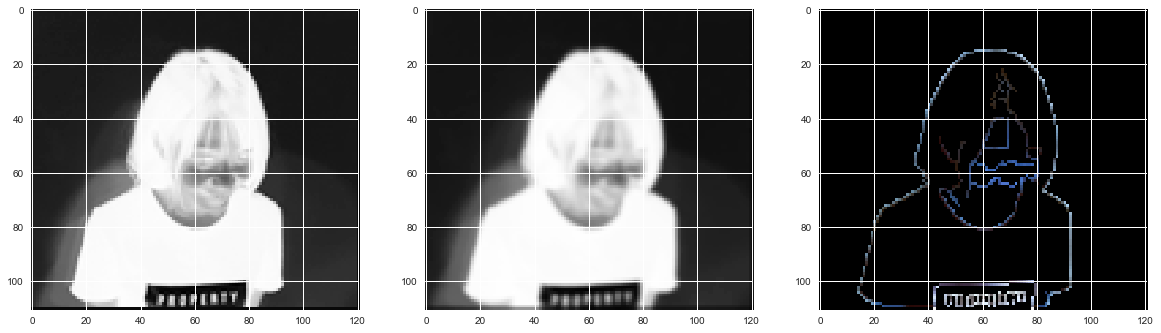

In [30]:
yyimg=cv2.imread(str(path))
gray = cv2.cvtColor(yyimg, cv2.COLOR_BGR2GRAY)
gaussed = cv2.GaussianBlur(gray, (3,3), 0)
cannyed = cv2.Canny(gaussed, 10, 220)

## 将灰度边缘转化为BGR 
cannyed2 = cv2.cvtColor(cannyed, cv2.COLOR_GRAY2BGR) 

## 创建彩色边缘 
mask = cannyed > 0             # 边缘掩模
canvas = np.zeros_like(yyimg)    # 创建画布
canvas[mask] = yyimg[mask]       # 赋值边缘

plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.imshow(gray) 

plt.subplot(1,3,2)
plt.imshow(gaussed)

plt.subplot(1,3,3)
plt.imshow(canvas) 